# Backpropagation Notebook
Design Your Own Adventure Project: QEA Spring 2018  
Hwei-Shin Harriman

In [269]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [270]:
def sigmoid(aj):
    #Calculates the sigmoid function using logistic
    return 1 / (1 + np.exp(-aj))

In [271]:
def sigPrime(z):
    return (z * (1 - z))

In [272]:
def calcAj(weights, prevLayerOut):    
    #Calculates the sum of the weights and outputs from previous 
    #prevLayerOut and weights must be np arrays
    #weights should be one ROW of the weights matrix
    #prevLayerOut should be a ROW vector
    return np.dot(weights, prevLayerOut)

In [273]:
#given matrix of weights, number of nodes per hidden layer,
#and an input vector of data, propagate forward for one layer

def calcLayerOutputs(inputVec, weights, neuronsInLayer):
    #define matrix of output activations for all units in current layer
    outputs = []
    zi = inputVec
    for j in range(neuronsInLayer):
        #(1 x n) dot (1 x n)
        aj = calcAj(weights[j, :], zi)
        outputs.append(sigmoid(aj))
    
    #should be j outputs
    return np.asarray(outputs)

In [300]:
#Same as calcLayerOutputs but doesn't pass through a sigmoid function
def calcNetOutput(inputVec, weights, neuronsInLayer):
    #define matrix of output activations for all units in current layer
    outputs = []
    zi = inputVec
    for j in range(neuronsInLayer):
        #(1 x n) dot (1 x n)
        aj = calcAj(weights[j, :], zi)
        outputs.append(aj)
    
    #should be j outputs
    return np.asarray(outputs)

In [275]:
def sumOfSquareError(netOutput, target):
    #Takes 2 vectors of same dimensions, returns the sum-of-squares error
    return 0.5 * np.sum(np.power(netOutput - target, 2))

In [298]:
def calcDelta(netOutput, target):
    #Takes 2 np arrays, all activations from forward prop and actual target
    #returns delta value for each output neuron
    #assumes netOutput's last entry is activations of output layer
    sigOutk = []
    guesses = netOutput[-1]
    for k in range(len(guesses)):
        sigOutk.append(sigPrime(guesses[k]))
    return np.asarray(sigOutk) * (guesses - target)

In [299]:
#neuronsPerLayer = array with number of neurons in each hidden/output layer
def forwardprop(inputVec, weights, neuronsPerLayer):
    #calculates outputs for all neurons in network
    activations = [inputVec]
    
    #dynamically calculates activations for all nodes in network
    for layer in range(len(weights)):
        weightsInLayer = weights[layer]
        neuronsInLayer = np.shape(weightsInLayer)[0]
        
        #calculates all activations for current layer
        layerActivations = calcLayerOutputs(activations[layer], weightsInLayer[:, :], neuronsInLayer)
        
        #if on output layer, also calculate output without passing through sigmoid function
        if layer == (len(weights) - 1):
            netOut = calcNetOutput(activations[layer], weightsInLayer[:, :], neuronsInLayer)
            #TODO: Unsure about whether this should be:
            #layerActivations = netOut
            
        #adds resulting np array to list
        activations.append(layerActivations)
    #should be number of layers * j (neurons per layer) activations
    return activations, netOut

In [293]:
def backprop(activations, weights, deltaK):
    #calculates deltas for hidden units
    allDeltas = [deltaK]
    for layer in range(len(weights) - 1, 0, -1):
        #fetches activations from previous layer
        zj = activations[layer - 1]
        weightsInLayer = weights[layer]
        
        #empty cache list
        deltaJs = []
        for j in range(len(zj)):
            dj = sigPrime(zj[j]) * np.dot(weightsInLayer[j, :], allDeltas[0])
            deltaJs.append(dj)
        
        #builds list of deltas to have same indexing as weights matrix
        allDeltas.insert(0, np.asarray(deltaJs))
        
    #inserts placeholder activations on input vecs for indexing in
    #updateWeights function
    allDeltas.insert(0, activations[0])
    return allDeltas

In [279]:
#testing functionality of forward propagation

#generate random vector and weight matrix
inputVec = np.random.rand(10)
numLayers = 3
weightMatrix = []
for layer in range(numLayers):
    weightMatrix.append(np.random.randn(10, 10))
neuronsPerLayer = [10, 10, 10]
activations, guessVec = forwardprop(inputVec, weightMatrix, neuronsPerLayer)

#first entry of activations is the input vector
print(activations)
print(guessVec)

[array([0.21097929, 0.31070097, 0.5823619 , 0.91421451, 0.76385213,
       0.09663155, 0.21134969, 0.0860696 , 0.29906261, 0.31482641]), array([0.60693362, 0.42291762, 0.53677095, 0.81759529, 0.88454944,
       0.7359575 , 0.94956267, 0.83138158, 0.89805622, 0.68880227]), array([0.99070749, 0.39441403, 0.79331718, 0.69526797, 0.60117633,
       0.05357645, 0.95099324, 0.06565698, 0.72867649, 0.98744954]), array([0.04596061, 0.18211081, 0.17127692, 0.01705417, 0.84979419,
       0.86820292, 0.99855961, 0.36373416, 0.21627882, 0.67162766])]
[-3.0329203  -1.50211149 -1.57660438 -4.05415903  1.73298773  1.88516201
  6.54140033 -0.55919319 -1.28748489  0.71555596]


In [280]:
#test functionality of deltas function
targets = np.array([0., 0., 0., 1., 1., 1. , 0., 0., 1., 0.])

deltas = calcDelta(activations, targets)
deltas

array([ 0.00201529,  0.02712476,  0.02431124, -0.01647744, -0.01917288,
       -0.01508109,  0.00143624,  0.08417959, -0.13284254,  0.14812341])

In [281]:
#test functionality of backprop
alldeltas = backprop(activations, weightMatrix, deltas)
alldeltas

[array([0.21097929, 0.31070097, 0.5823619 , 0.91421451, 0.76385213,
        0.09663155, 0.21134969, 0.0860696 , 0.29906261, 0.31482641]),
 array([-0.00365212, -0.02520321,  0.01829818, -0.00766856,  0.00302656,
         0.00157913,  0.02849039, -0.00070579, -0.00405121, -0.00648931]),
 array([-0.02485708, -0.0540787 , -0.03010654,  0.00820516, -0.03985493,
         0.00303697, -0.00440823,  0.0333322 ,  0.01574399,  0.03943848]),
 array([ 0.00201529,  0.02712476,  0.02431124, -0.01647744, -0.01917288,
        -0.01508109,  0.00143624,  0.08417959, -0.13284254,  0.14812341])]

In [282]:
def calcGradient(learningRate, deltas, activations, weights):
    #for each layer, for each weight @ every node, calculate the gradient
    gradient = []
    for layer in range(len(weights) -1, -1, -1):
        deltaKs = deltas[layer]
        outJs = activations[layer]
        weightDims = weights[layer]
        
        #pre-allocate array to fill with gradient values
        weightsInLayer = np.array([[0.] * weightDims.shape[0]] * weightDims.shape[1])

        for k in range(len(deltaKs)):
            for j in range(len(outJs)):
                weightsInLayer[j,k] =  1 * learningRate * deltaKs[k] * outJs[j]
        
        gradient.insert(0, weightsInLayer)
    return gradient
updatedW = calcGradient(.001, alldeltas, activations, weightMatrix)
updatedW

[array([[4.45122588e-05, 6.55514684e-05, 1.22866298e-04, 1.92880323e-04,
         1.61156976e-04, 2.03872547e-05, 4.45904068e-05, 1.81589025e-05,
         6.30960159e-05, 6.64218516e-05],
        [6.55514684e-05, 9.65350924e-05, 1.80940408e-04, 2.84047334e-04,
         2.37329597e-04, 3.00235153e-05, 6.56665540e-05, 2.67419079e-05,
         9.29190432e-05, 9.78168719e-05],
        [1.22866298e-04, 1.80940408e-04, 3.39145388e-04, 5.32403701e-04,
         4.44838381e-04, 5.62745316e-05, 1.23082009e-04, 5.01236557e-05,
         1.74162672e-04, 1.83342910e-04],
        [1.92880323e-04, 2.84047334e-04, 5.32403701e-04, 8.35788165e-04,
         6.98324699e-04, 8.83419619e-05, 1.93218954e-04, 7.86860762e-05,
         2.73407377e-04, 2.87818874e-04],
        [1.61156976e-04, 2.37329597e-04, 4.44838381e-04, 6.98324699e-04,
         5.83470077e-04, 7.38122129e-05, 1.61439912e-04, 6.57444467e-05,
         2.28439613e-04, 2.40480827e-04],
        [2.03872547e-05, 3.00235153e-05, 5.62745316e-05, 8.8

In [283]:
def updateWeights(learningRate, deltas, activations, weights):
    #calculate the gradient
    gradComponents = calcGradient(learningRate, deltas, activations, weights)
    
    #update all of the weights based on the gradient
    newWeights = []
    for layer in range(len(weights)):
        weightsInLayer = weights[layer]
        gradInLayer = gradComponents[layer]
        
        newWeights.append(gradInLayer + weightsInLayer)
    return newWeights
newWeights = updateWeights(.001, alldeltas, activations, weightMatrix)

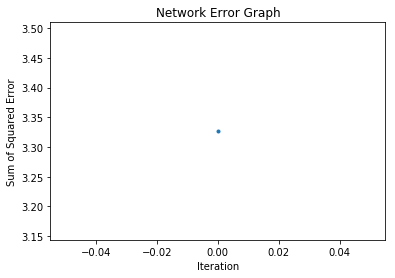

last guess:  [0.99854062 0.89082565 0.98568348 0.01825831 0.69109544 0.05949501
 0.26903473 0.18031908 0.07529502 0.99383619]
actual vector:  [0.21097929 0.31070097 0.5823619  0.91421451 0.76385213 0.09663155
 0.21134969 0.0860696  0.29906261 0.31482641]
difference:  [ 0.78756134  0.58012468  0.40332157 -0.89595619 -0.07275669 -0.03713654
  0.05768504  0.09424948 -0.22376759  0.67900978]


3.3268491907760223

In [294]:
def trainNetwork(patterns, learningRate, neuronsPerLayer, targets):
    #Randomly initialize all weights in network
    weights = []
    errors = []
    for layer in range(len(neuronsPerLayer) - 1):
        weights.append(np.random.randn(neuronsPerLayer[layer], neuronsPerLayer[layer + 1]))
    
    #Initialize error plot
    fig, ax = plt.subplots()
    
    #Loop through all input vectors, train the network, plot the error
    for p in range(len(patterns)):
        #forward pass through network, find all activations
        activations, netOut = forwardprop(patterns[p], weights, neuronsPerLayer)
        
        #calculate deltas at output layer
        deltaK = calcDelta(activations, targets[p])
        
        #calculate rest of deltas with backpropagation
        allDeltas = backprop(activations, weights, deltaK)
        
        #update weights
        weights = updateWeights(learningRate, allDeltas, activations, weights)
        
        #TODO: ideally(?) this should be sumOfSquareError(netOut, targets[p])
        #calculate network error
        error = sumOfSquareError(activations[-1], targets[p])
        
        #add to list of errors
        errors.append(error)
        

    #plot the error
    ax.plot(errors, marker= '.')
    ax.set(xlabel = 'Iteration', ylabel= 'Sum of Squared Error', title= 'Network Error Graph')
    plt.show()
    
    print("last guess: ", activations[-1])
    print("actual vector: ", patterns[-1])
    print("difference: ", (activations[-1] - patterns[-1]))
    return error
trainNetwork([inputVec], .001, [10, 10, 10], [targets])

In [295]:
#sanity check numerical differentiation

#calculate f(x + 10**-6)
errVec = inputVec + 10**-6
activations1, netOut1 = forwardprop(errVec, weightMatrix, neuronsPerLayer)
deltas1 = calcDelta(activations1, targets)
alldeltas1 = backprop(activations1, weightMatrix, deltas1)
updatedW1 = calcGradient(.001, alldeltas1, activations1, weightMatrix)

for entry in range(len(updatedW1)):
    #for each layer of network, return (f(x + 10**-6) - f(x)) / 10**-6
    diff = (updatedW1[entry] - updatedW[entry])/ 10**-6
    print("diff")
    print(diff)
    

diff
[[0.00042196 0.00052168 0.00079334 0.00112519 0.00097483 0.00030761
  0.00042233 0.00029705 0.00051004 0.00052581]
 [0.00052168 0.0006214  0.00089306 0.00122492 0.00107455 0.00040733
  0.00052205 0.00039677 0.00060976 0.00062553]
 [0.00079334 0.00089306 0.00116472 0.00149658 0.00134622 0.00067899
  0.00079371 0.00066843 0.00088143 0.00089719]
 [0.00112519 0.00122492 0.00149658 0.00182843 0.00167807 0.00101085
  0.00112557 0.00100029 0.00121328 0.00122904]
 [0.00097483 0.00107455 0.00134622 0.00167807 0.00152771 0.00086048
  0.0009752  0.00084992 0.00106292 0.00107868]
 [0.00030761 0.00040733 0.00067899 0.00101085 0.00086048 0.00019326
  0.00030798 0.0001827  0.0003957  0.00041146]
 [0.00042233 0.00052205 0.00079371 0.00112557 0.0009752  0.00030798
  0.0004227  0.00029742 0.00051041 0.00052618]
 [0.00029705 0.00039677 0.00066843 0.00100029 0.00084992 0.0001827
  0.00029742 0.00017214 0.00038513 0.0004009 ]
 [0.00051004 0.00060976 0.00088143 0.00121328 0.00106292 0.0003957
  0.00051

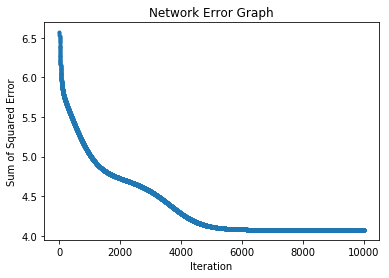

last guess:  [1.18476149e-018 9.94012502e-010 6.38361240e-005 1.00000000e+000
 2.06487697e-008 1.00000000e+000 5.53590570e-118 1.08008167e-020
 1.61670495e-007 1.00000000e+000]
actual vector:  [-0.35784792 -0.21528855 -0.15429744  0.8339397  -0.16917721  0.17873882
 -2.5710332  -0.41497714 -0.15884044  1.64184479]
difference:  [ 0.35784792  0.21528855  0.15436128  0.1660603   0.16917723  0.82126118
  2.5710332   0.41497714  0.1588406  -0.64184479]


4.074255707417725

In [297]:
#test with dummy data
num_tests = 10000
inputData = []
targetData = []

vec = np.random.randn(10)
#Generate data where targets are the same as the input vectors
for test in range(num_tests):
    inputData.append(vec)
    targetData.append(vec)

#moment of truth let's gooo
trainNetwork(inputData, .001, [10, 10], targetData)

In [287]:
np.exp(np.array([0., 1., 2.]))

array([1.        , 2.71828183, 7.3890561 ])